In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

def printChart(envName):
    # Path to your Excel file
    file_path = '~/Desktop/Msc_Thesis/Charts/Data.xlsx'

    # Read the data from the Excel file
    font_properties = {'family': 'serif', 'weight': 'normal', 'size': 12}
    rcParams.update({'font.family': 'serif',
                 'font.serif': 'Times New Roman',
                 'font.weight': 'normal',
                 'font.size': 12})
    
    data = pd.read_excel(file_path, sheet_name=envName)
    sns.set_theme(style="darkgrid")
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(data['Step'], data['MLP'], label='MLP', color="purple")
    plt.plot(data['Step'], data['GAUSSIAN'], label='SatNet-Gaussian',color="green")
    plt.plot(data['Step'], data['BETA'], label='SatNet-Beta',color="red")

    # Adding titles and labels with specific font properties
    plt.title(envName, fontdict={'family': 'serif', 'weight': 'normal', 'size': 16})
    plt.xlabel('Number of Timesteps', fontdict={'family': 'serif', 'weight': 'normal', 'size': 14})
    plt.ylabel('Mean Reward', fontdict={'family': 'serif', 'weight': 'normal', 'size': 14})

    # Adjust x-axis ticks
    max_step = data['Step'].max()
    ticks = range(0, max_step + 1, 200000)
    plt.xticks(ticks, [f'{tick}' for tick in ticks], fontproperties='Times New Roman')
    plt.yticks(fontproperties='Times New Roman')

    # Customize legend to remove the box outline and make it transparent
    legend = plt.legend(title='Model Type', frameon=False, prop={'family': 'serif', 'weight': 'normal', 'size': 12})
    frame = legend.get_frame()
    frame.set_facecolor('none')
    frame.set_edgecolor('none')

    # Show the plot
    plt.show()

printChart("HumanoidStandup-v4")


/var/folders/53/c70tt6pd7ln4cr3sjj0tztkr0000gn/T/ipykernel_7998/1332921965.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Policy', y='Reward', data=df, palette=['skyblue', 'orange'] * len(titles))


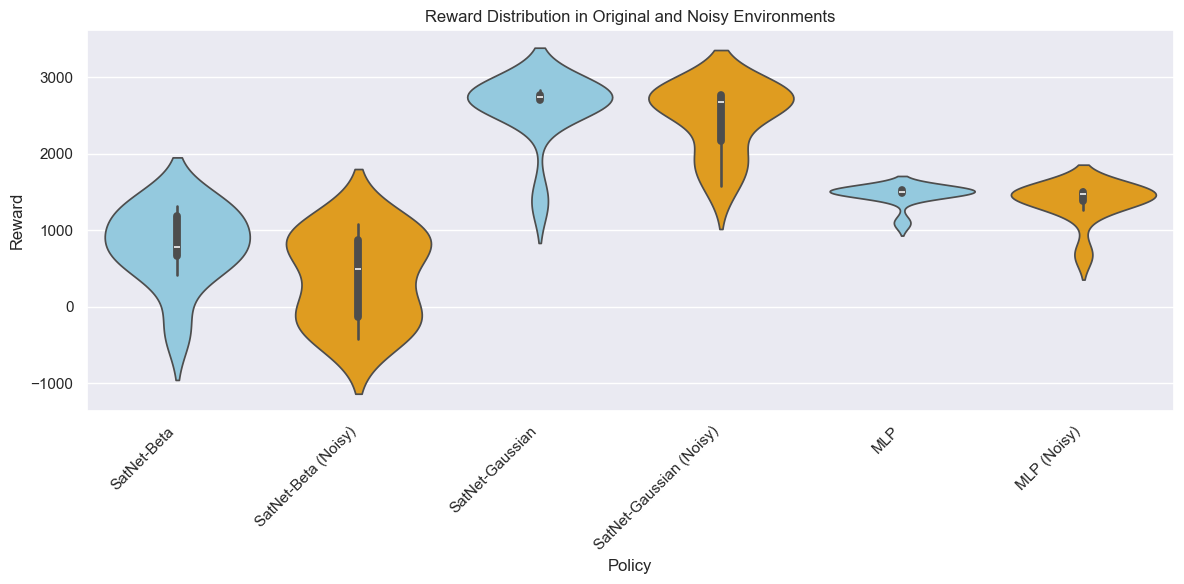

In [147]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

def plot_violin_plot(results_files, titles, output_file="violin_plot_comparison.png"):
    original_rewards_data = []
    noisy_rewards_data = []
    combined_rewards_data = []
    combined_titles = []

    # Read rewards from JSON files
    for results_file in results_files:
        with open(results_file, "r") as f:
            results = json.load(f)
            original_rewards_data.append(results["original"]["episode_rewards"])
            noisy_rewards_data.append(results["noisy"]["episode_rewards"])

    # Combine data for violin plot
    for i, title in enumerate(titles):
        for reward in original_rewards_data[i]:
            combined_rewards_data.append({'Reward': reward, 'Policy': f'{title}'})
        for reward in noisy_rewards_data[i]:
            combined_rewards_data.append({'Reward': reward, 'Policy': f'{title} (Noisy)'})

    # Convert to DataFrame
    import pandas as pd
    df = pd.DataFrame(combined_rewards_data)

    # Plot violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Policy', y='Reward', data=df, palette=['skyblue', 'orange'] * len(titles))
    plt.ylabel('Reward')
    plt.title('Reward Distribution in Original and Noisy Environments')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save and show the plot
    plt.savefig(output_file)
    plt.show()

# Example usage
results_files = [
    "evaluations/HalfCheetah-v4/BETA_results.json",
    "evaluations/HalfCheetah-v4/GAUSSIAN_results.json",
    "evaluations/HalfCheetah-v4/MLP_results.json",
]

titles = ["SatNet-Beta", "SatNet-Gaussian", "MLP"]

plot_violin_plot(results_files, titles, output_file="violin_plot_comparison.png")


In [ ]:


results_files = [
    "evaluations/Ant-v4/BETA_results.json",
    "evaluations/Ant-v4/GAUSSIAN_results.json",
    "evaluations/Ant-v4/MLP_results.json",
]

def get_percentage(results_files):
    
    original_mean_rewards = []
    noisy_mean_rewards = []
    
    for results_file in results_files:
        with open(results_file, "r") as f:
            results = json.load(f)
            original_mean_rewards.append(results["original"]["mean_reward"])
            noisy_mean_rewards.append(results["noisy"]["mean_reward"])

    # Convert lists to NumPy arrays
    original_mean_rewards = np.array(original_mean_rewards)
    noisy_mean_rewards = np.array(noisy_mean_rewards)

    # Calculate percentage
    percentage_loss = 100 * (original_mean_rewards - noisy_mean_rewards) / original_mean_rewards
    for i in range(0,len(results_files)):
        print(f"{results_files[i]}Percentage: %{percentage_loss[i]}")
    return percentage_loss
percentage_loss= get_percentage(results_files)

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Model': titles,
    'Percentage Loss': percentage_loss
})
data.set_index('Model', inplace=True)


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Percentage Loss (%)'})
plt.title('Mean Reward Loss in Noisy Environment')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()

In [137]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

/var/folders/53/c70tt6pd7ln4cr3sjj0tztkr0000gn/T/ipykernel_7998/1765112394.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_values = percentages_df.applymap(lambda x: f"{x:.1f}%") + \
/var/folders/53/c70tt6pd7ln4cr3sjj0tztkr0000gn/T/ipykernel_7998/1765112394.py:81: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ci_lower_df.applymap(lambda x: f" ({x:.1f}%, ") + \
/var/folders/53/c70tt6pd7ln4cr3sjj0tztkr0000gn/T/ipykernel_7998/1765112394.py:82: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ci_upper_df.applymap(lambda x: f"{x:.1f}%)")


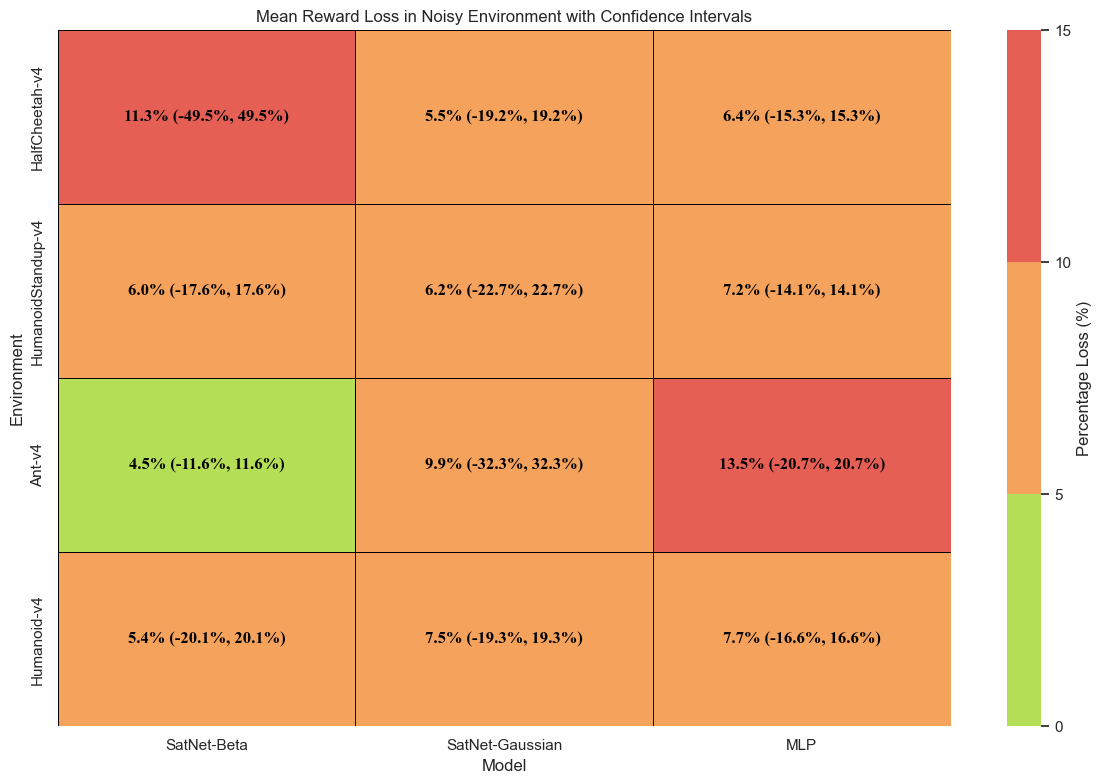

In [132]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
from scipy import stats

def get_percentage(results_files):
    original_mean_rewards = []
    noisy_mean_rewards = []
    original_rewards = []
    noisy_rewards = []

    for results_file in results_files:
        with open(results_file, "r") as f:
            results = json.load(f)
            original_mean_rewards.append(results["original"]["mean_reward"])
            noisy_mean_rewards.append(results["noisy"]["mean_reward"])
            original_rewards.append(results["original"]["episode_rewards"])
            noisy_rewards.append(results["noisy"]["episode_rewards"])

    # Convert lists to NumPy arrays
    original_mean_rewards = np.array(original_mean_rewards)
    noisy_mean_rewards = np.array(noisy_mean_rewards)

    # Calculate percentage loss
    percentage_loss = 100 * (original_mean_rewards - noisy_mean_rewards) / original_mean_rewards
    
    # Calculate confidence intervals
    ci_lower = []
    ci_upper = []
    for o_rewards, n_rewards in zip(original_rewards, noisy_rewards):
        o_rewards = np.array(o_rewards)
        n_rewards = np.array(n_rewards)
        mean_diff = np.mean(o_rewards) - np.mean(n_rewards)
        se_diff = stats.sem(o_rewards - n_rewards)
        ci = stats.t.interval(0.95, len(o_rewards) - 1, loc=mean_diff, scale=se_diff)
        ci_lower.append(100 * (mean_diff - ci[1]) / np.mean(o_rewards))
        ci_upper.append(100 * (ci[1] - mean_diff) / np.mean(o_rewards))
    
    return percentage_loss, ci_lower, ci_upper

def calculate_all_percentages(base_dir):
    all_percentages = {}
    for env in os.listdir(base_dir):
        env_dir = os.path.join(base_dir, env)
        if os.path.isdir(env_dir):
            results_files = [os.path.join(env_dir, f) for f in os.listdir(env_dir) if f.endswith('_results.json')]
            models = [os.path.splitext(f)[0].split('_')[0] for f in os.listdir(env_dir) if f.endswith('_results.json')]
            percentages, ci_lower, ci_upper = get_percentage(results_files)
            all_percentages[env] = {
                'percentages': dict(zip(models, percentages)),
                'ci_lower': dict(zip(models, ci_lower)),
                'ci_upper': dict(zip(models, ci_upper))
            }
    return all_percentages

# Example usage
base_dir = "evaluations"
all_percentages = calculate_all_percentages(base_dir)

# Create DataFrames for the heatmap
percentages_df = pd.DataFrame({env: data['percentages'] for env, data in all_percentages.items()}).T
ci_lower_df = pd.DataFrame({env: data['ci_lower'] for env, data in all_percentages.items()}).T
ci_upper_df = pd.DataFrame({env: data['ci_upper'] for env, data in all_percentages.items()}).T

# Rename and reorder the columns
percentages_df = percentages_df.rename(columns={"BETA": "SatNet-Beta", "MLP": "MLP", "GAUSSIAN": "SatNet-Gaussian"})
percentages_df = percentages_df[["SatNet-Beta", "SatNet-Gaussian", "MLP"]]

ci_lower_df = ci_lower_df.rename(columns={"BETA": "SatNet-Beta", "MLP": "MLP", "GAUSSIAN": "SatNet-Gaussian"})
ci_lower_df = ci_lower_df[["SatNet-Beta", "SatNet-Gaussian", "MLP"]]

ci_upper_df = ci_upper_df.rename(columns={"BETA": "SatNet-Beta", "MLP": "MLP", "GAUSSIAN": "SatNet-Gaussian"})
ci_upper_df = ci_upper_df[["SatNet-Beta", "SatNet-Gaussian", "MLP"]]

# Format the data for annotation with confidence intervals
formatted_values = percentages_df.applymap(lambda x: f"{x:.1f}%") + \
                   ci_lower_df.applymap(lambda x: f" ({x:.1f}%, ") + \
                   ci_upper_df.applymap(lambda x: f"{x:.1f}%)")

# Define a custom colormap with lighter colors
colors = ["#b4de56", "#f5a15c", "#e65f55"]  # lightgreen, peachpuff, lightcoral

n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Custom normalization to ensure specific ranges
bounds = [0, 5, 10, 15]
norm = BoundaryNorm(bounds, n_bins, clip=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    percentages_df, 
    annot=formatted_values, 
    fmt='', 
    cmap=custom_cmap, 
    norm=norm, 
    cbar_kws={'label': 'Percentage Loss (%)'}, 
    linewidths=0.5, 
    linecolor='black',
    annot_kws={"fontweight": "bold", "color": "black", "fontfamily": "Times New Roman"}
)
plt.title('Mean Reward Loss in Noisy Environment with Confidence Intervals')
plt.xlabel('Model')
plt.ylabel('Environment')
plt.tight_layout()
plt.savefig("mean_reward_loss_heatmap_with_light_colors.png")
plt.show()
